In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

# Setting up the library folder
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/home/jkumar16/Training/ISLR/ISLR-python-master/Data/Credit.csv', index_col=0)

In [5]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
import ExploratoryDataAnalysis as eda
df1 = df.select_dtypes(['object'])
reload(eda)
eda.freq_table(df1)

Female    207
 Male     193
Name: Gender, dtype: int64
---------------------------------------
No     360
Yes     40
Name: Student, dtype: int64
---------------------------------------
Yes    245
No     155
Name: Married, dtype: int64
---------------------------------------
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
---------------------------------------


In [7]:
# gender = {'Female':0, 'Male':1}
# student = {'No':0, 'Yes':1}
# married = {'No':0, 'Yes':1}

# df['Gender'] = df['Gender'].map(gender)
# df['Student'] = df['Student'].map(student)
# df['Married'] = df['Married'].map(married)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Student'] = lb.fit_transform(df['Student'])
df['Married'] = lb.fit_transform(df['Married'])

ethnicity = pd.get_dummies(df['Ethnicity'], prefix='Ethnicity', drop_first=True)

In [8]:
print(df['Gender'].value_counts())
print(df['Student'].value_counts())
print(df['Married'].value_counts())

1    207
0    193
Name: Gender, dtype: int64
0    360
1     40
Name: Student, dtype: int64
1    245
0    155
Name: Married, dtype: int64


In [9]:
df.shape

(400, 11)

In [10]:
df1 = pd.concat([df, ethnicity], axis=1)
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,1,1,1,Asian,903,1,0
3,104.593,7075,514,4,71,11,0,0,0,Asian,580,1,0
4,148.924,9504,681,3,36,11,1,0,0,Asian,964,1,0
5,55.882,4897,357,2,68,16,0,0,1,Caucasian,331,0,1


In [11]:
X = df1.drop(['Balance','Ethnicity'], axis=1).values
#X = df1[['Gender']]
y = df1.Balance

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 6.1.1 Best Subset Selection

In [13]:
import itertools
from sklearn.metrics import mean_squared_error, r2_score

def best_selection(regr, X, y):
    best_subset_ = {'Predictors':[], 'NoPreditors':[], 'MSE': [], 'RSquared':[]} #'PredictorName':[], , 'Model':[]
    
    p_idx = list(range(X.shape[1]))
    for L in range(X.shape[1]+1):
        for subset in itertools.combinations(p_idx, L):
            if list(subset):
                x = X[:, subset]               
                regr.fit(x,y)
                
                best_subset_['Predictors'].append(list(subset))
                best_subset_['NoPreditors'].append(len(subset))
                best_subset_['MSE'].append(mean_squared_error(y, regr.predict(x)))
                best_subset_['RSquared'].append(r2_score(y, regr.predict(x)))
                #best_subset_['Model'].append(regr)
            else:
                x = np.ones((len(X),1))
                regr.fit(x, y)
                
                best_subset_['Predictors'].append(list(subset))
                best_subset_['NoPreditors'].append(len(subset))
                best_subset_['MSE'].append(mean_squared_error(y, regr.predict(x)))
                best_subset_['RSquared'].append(r2_score(y, regr.predict(x)))
                #best_subset_['Model'].append(regr)
    return best_subset_

best_subset_ = best_selection(regr, X, y)

In [14]:
best_subset = pd.DataFrame(best_subset_)
best_subset.head(10)

,MSE,NoPreditors,Predictors,RSquared
0,210849.779775,0,[],0.000000
1,165521.861277,1,[0],0.214977
2,54289.141648,1,[1],0.742522
3,53587.805082,1,[2],0.745848
4,209273.740924,1,[3],0.007475
5,210849.069704,1,[4],0.000003
6,210836.076856,1,[5],0.000065
7,210752.549991,1,[6],0.000461
8,196703.849097,1,[7],0.067090
9,210842.992839,1,[8],0.000032


In [15]:
regr1 = best_subset_['Model'][0]
regr1.coef_
regr1.intercept_

KeyError: 'Model'

In [16]:
x = X[:,[0, 1, 3, 5, 6, 7, 8, 10]]
regr.fit(x,y)
print('MSE: {}'.format(mean_squared_error(y, regr.predict(x))))
print('R^2: {}'.format(r2_score(y, regr.predict(x))))

MSE: 9735.468389748594
R^2: 0.953827467118356


In [17]:
best_subset.shape

(2048, 4)

### Fig 6.1

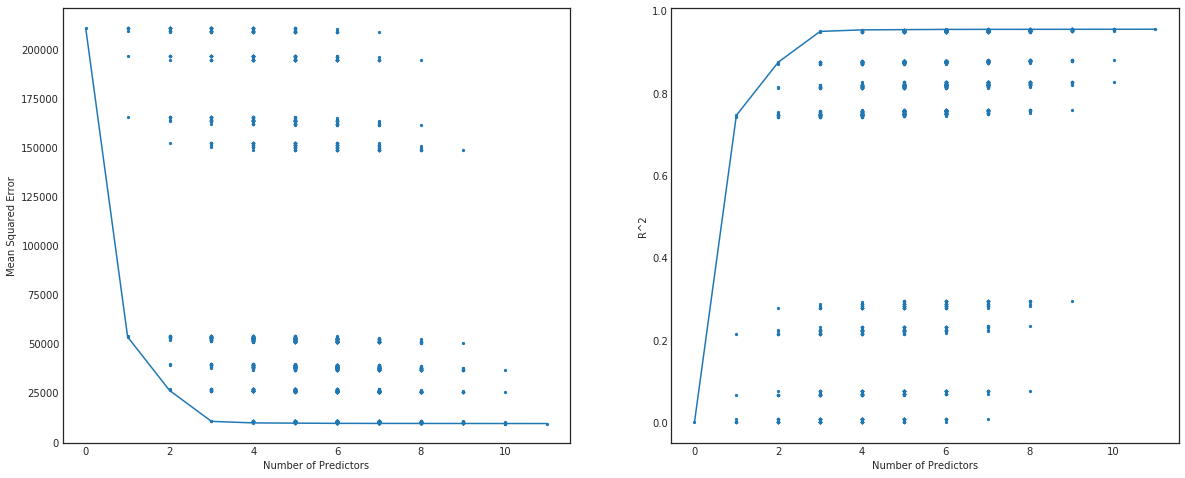

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))

min_mse = best_subset.groupby('NoPreditors', as_index=False)['MSE'].min()
ax1.scatter(best_subset['NoPreditors'], best_subset['MSE'], s=5)
ax1.plot(min_mse['NoPreditors'], min_mse['MSE'])
ax1.set_xlabel('Number of Predictors')
ax1.set_ylabel('Mean Squared Error')

max_r2 = best_subset.groupby('NoPreditors', as_index=False)['RSquared'].max()
ax2.scatter(best_subset['NoPreditors'], best_subset['RSquared'], s=5)
ax2.plot(max_r2['NoPreditors'], max_r2['RSquared'])
ax2.set_xlabel('Number of Predictors')
ax2.set_ylabel('R^2')

## 6.1.2 Stepwise Selection

### Forward Stepwise Selection

<img src="img/forward_selection.PNG" align='left' width=60% height=10%>

In [19]:
predictors_list = list(range(p))
predictors_list

NameError: name 'p' is not defined

In [20]:
def forward_selection(regr, X, y):
    p = X.shape[1]
    predictors_list = list(range(p))
    forward_selection_ =  {'k':[], 'BestModel':[], 'StepModel':[], 'MSE': [], 'RSquared':[]}    
    
    ## Step 1: Null Model M0 ###############
    x = np.ones((len(X),1))
    regr.fit(x, y)
    
    forward_selection_['k'].append(-1)
    forward_selection_['BestModel'].append([])
    forward_selection_['StepModel'].append([])
    forward_selection_['MSE'].append(mean_squared_error(y, regr.predict(x)))
    forward_selection_['RSquared'].append(r2_score(y, regr.predict(x)))
    
    model_p_idx = list() # 
    
    ## Step 2 ###############    
    for k in range(p):
        k_index = [i for i, v in enumerate(forward_selection_['k']) if v == k-1]
        mse = np.array(forward_selection_['MSE'])[k_index]
        r2 = np.array(forward_selection_['RSquared'])[k_index]
        best_index = k_index[np.argmin(mse)] # np.argmax(r2)
        
        model_p_idx.append(best_index)
        best_model = forward_selection_['StepModel'][best_index] 
        
        remaining_predictors = list(set(predictors_list) - set(best_model))
        
        for j in remaining_predictors:
            step_model = best_model.copy()
            step_model.append(j)
            x = X[:,step_model]
            regr.fit(x, y)
            
            ## Appending info to dictionary
            forward_selection_['k'].append(k)
            forward_selection_['BestModel'].append(best_model)
            forward_selection_['StepModel'].append(step_model)
            forward_selection_['MSE'].append(mean_squared_error(y, regr.predict(x)))
            forward_selection_['RSquared'].append(r2_score(y, regr.predict(x)))           
        
        #print(k,k_index, best_index, forward_selection_['MSE'][best_index])
    last_idx = [i for i, v in enumerate(forward_selection_['k']) if v == k][0]
    model_p_idx.append(last_idx)
    #print(model_p_idx)
    return  forward_selection_, model_p_idx  
  
forward_selection_, model_p_idx = forward_selection(regr, X, y)
print(model_p_idx)

[0, 3, 12, 27, 31, 39, 46, 56, 58, 61, 64, 66]


In [23]:
#X = df1.drop(['Balance','Ethnicity'], axis=1).values
col_arr = df1.drop(['Balance','Ethnicity'], axis=1).columns

arr = np.array(forward_selection_['StepModel'])[model_p_idx]
for i in arr:
    print(list(col_arr[i]))

[]
['Rating']
['Rating', 'Income']
['Rating', 'Income', 'Student']
['Rating', 'Income', 'Student', 'Limit']
['Rating', 'Income', 'Student', 'Limit', 'Cards']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Ethnicity_Asian']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Ethnicity_Asian', 'Married']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Ethnicity_Asian', 'Married', 'Ethnicity_Caucasian']
['Rating', 'Income', 'Student', 'Limit', 'Cards', 'Age', 'Gender', 'Ethnicity_Asian', 'Married', 'Ethnicity_Caucasian', 'Education']


In [25]:
pd.DataFrame(forward_selection_)[['k','BestModel','StepModel','MSE','RSquared']].head()

,k,BestModel,StepModel,MSE,RSquared
0,-1,[],[],210849.779775,0.000000
1,0,[],[0],165521.861277,0.214977
2,0,[],[1],54289.141648,0.742522
3,0,[],[2],53587.805082,0.745848
4,0,[],[3],209273.740924,0.007475


### Backward Stepwise Selection

<img src="img/backward_selection.PNG" align='left' width=60%>

In [26]:
def backward_selection(regr, X, y):
    p = X.shape[1]
    predictors_list = list(range(p))
    backward_selection_ =  {'k':[], 'BestModel':[], 'StepModel':[], 'MSE': [], 'RSquared':[]}    
    
    ##  Full Model M0 ###############
    regr.fit(X, y) 
    
    backward_selection_['k'].append(p)
    backward_selection_['BestModel'].append(predictors_list)
    backward_selection_['StepModel'].append(predictors_list)
    backward_selection_['MSE'].append(mean_squared_error(y, regr.predict(X)))
    backward_selection_['RSquared'].append(r2_score(y, regr.predict(X)))
    
    model_p_idx = list() # 
    
    ## Step 2 ###############    
    for k in range(p,0,-1):
        k_index = [i for i, v in enumerate(backward_selection_['k']) if v == k]
        mse = np.array(backward_selection_['MSE'])[k_index]
        r2 = np.array(backward_selection_['RSquared'])[k_index]

        best_index = k_index[np.argmin(mse)] # np.argmax(r2)
        model_p_idx.append(best_index)
        best_model = backward_selection_['StepModel'][best_index] 

        for j in best_model:
            step_model = best_model.copy()
            step_model.remove(j) ## removing one perdictor from Mk
            
            x = X[:,step_model]
            if x.shape[1] == 0:
                x = x = np.ones((len(X),1))##  Null Model M0 ###############
            regr.fit(x, y)
            
            ## Appending info to dictionary
            backward_selection_['k'].append(k-1)
            backward_selection_['BestModel'].append(best_model)
            backward_selection_['StepModel'].append(step_model)
            backward_selection_['MSE'].append(mean_squared_error(y, regr.predict(x)))
            backward_selection_['RSquared'].append(r2_score(y, regr.predict(x)))           
        
        #print(k,k_index, best_index, backward_selection_['MSE'][best_index])

    last_idx = [i for i, v in enumerate(backward_selection_['k']) if v == k][0]
    model_p_idx.append(last_idx)
    #print(model_p_idx)
    return  backward_selection_, model_p_idx  

backward_selection_, model_p_idx = backward_selection(regr, X, y)


In [27]:
pd.DataFrame(backward_selection_)[['k','BestModel','StepModel','MSE','RSquared']].head()

,k,BestModel,StepModel,MSE,RSquared
0,11,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",9466.825477,0.955102
1,10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",36544.730871,0.826679
2,10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10]",10294.450948,0.951176
3,10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]",9597.609758,0.954481
4,10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]",9873.581193,0.953172


### Hybrid Appraches - Combination of Forward and Backward Selection

##### To be developed

---

# 6.1.3 Choosing the Optimal Model

## Understanding the RSS, MSE, MAE, $R^2$, $C_P$, AIC, BIC

### Mallow's $C_p = \frac{1}{n}(RSS + 2d\hat{\sigma}^2)$
### Akaike information criterion $(AIC) = \frac{1}{n\hat{\sigma}^2}(RSS + 2d\hat{\sigma}^2)$ 
### Bayesian information criterion $(BIC) = \frac{1}{n\hat{\sigma}^2}(RSS + \log(n)d\hat{\sigma}^2)$
### Adjusted $R^2 = 1 - \frac{RSS\big{/}(n-d-1)}{TSS\big{/}(n-1)}$ where $R^2 = 1 - \frac{RSS}{TSS}$  

where Total Sum Of Squares $(TSS)=\sum(y_i - \bar{y})^2$, $\hat{\sigma}^2$ is an estimate of the variance of the error $\epsilon$.

In [28]:
#X = df1.drop(['Balance','Ethnicity'], axis=1).values
X = df1[['Gender']]
y = df1.Balance
regr = LinearRegression()
regr.fit(X,y)

print("Residual sum of squares(RSS): %.2f" % ((regr.predict(X) - y) ** 2).sum())
print("MSE/Mean RSS: %.2f" % np.mean((regr.predict(X) - y) ** 2))
print("Mean Absolute Error: %.2f" % np.mean(abs(regr.predict(X) - y)))

print('---------------------------------------------------------------')
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('residual_sum_of_squares: %.2f' % (mean_squared_error(y, regr.predict(X))*len(X)))
print('mean_squared_error: %.2f' % mean_squared_error(y, regr.predict(X)))
print('mean_absolute_error %.2f' % mean_absolute_error(y, regr.predict(X)))

Residual sum of squares(RSS): 84301020.00
MSE/Mean RSS: 210752.55
Mean Absolute Error: 389.67
---------------------------------------------------------------
residual_sum_of_squares: 84301020.00
mean_squared_error: 210752.55
mean_absolute_error 389.67


#### Fig 6.3 - To be developed

---

# 6.2 Shrinkage Method

## 6.2.1 Ridge Regression

<img src="img/RidgeRegression.PNG" width=70% align='left'>

<span style='font-size:25px;'>$\lambda\sum_{j=1}^p \beta^2_j$ </span>is called shrinkage penalty, and is small when $\beta_1,\beta_2,...,\beta_p$ are close to zero, and so it has the effect of shinking the estimates of $\beta_j$ towards zero.

<img src="img/Figure_6.4.PNG" width=90% align='left'>

In [62]:
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,0,1,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,1,1,1,Asian,903,1,0
3,104.593,7075,514,4,71,11,0,0,0,Asian,580,1,0
4,148.924,9504,681,3,36,11,1,0,0,Asian,964,1,0
5,55.882,4897,357,2,68,16,0,0,1,Caucasian,331,0,1


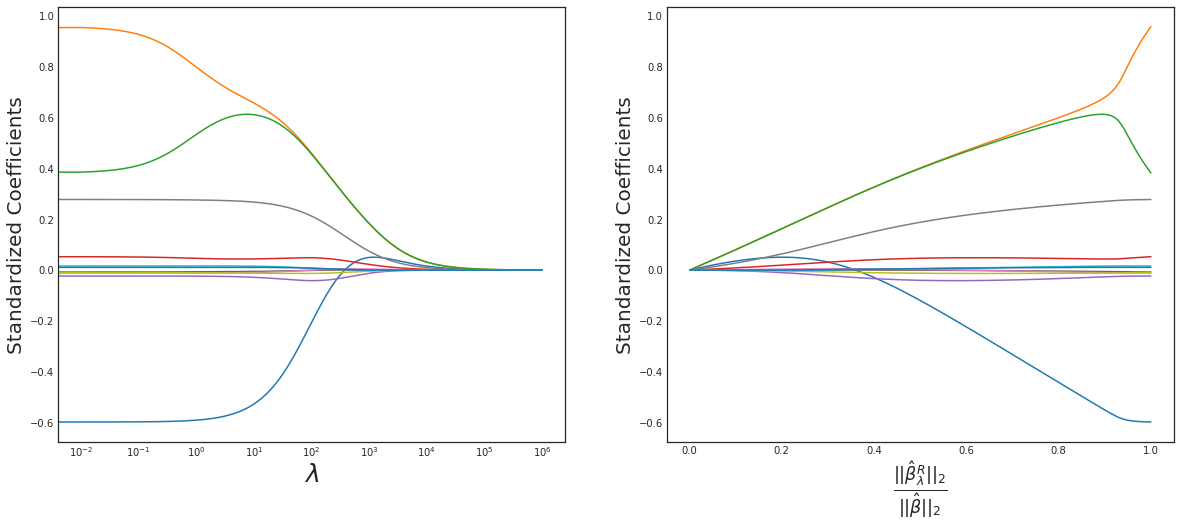

In [294]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

X = df1.drop(['Balance','Ethnicity'], axis=1).values
y = df1.Balance

## Scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

alphas = np.insert(10**np.linspace(-2,6,200),0, 0)
ridge = Ridge()
ridge_coeff = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    ridge_coeff.append(ridge.coef_)

## calculating estimated beta_hat_l2_norm ##################
beta_hat_l2_norm = np.sqrt(np.square(ridge_coeff).sum(axis=1))
    
## Calculating coeffs when lamda/alpha=0, Ridge regression gives the same value as RSS (least square method)
ridge.set_params(alpha=0)
ridge.fit(X,y)
least_square_coeff = ridge.coef_
beta_l2_norm = np.sqrt(np.square(least_square_coeff).sum())

ratio = beta_hat_l2_norm/beta_l2_norm


## Plotting the graph
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.plot(alphas, ridge_coeff)
ax1.set_xscale('log')
ax1.set_xlabel(r'$\lambda$', fontsize=25)
ax1.set_ylabel('Standardized Coefficients', fontsize=20)

ax2.plot(ratio, ridge_coeff)
ax2.set_xlabel(r'$\frac{\|\|\hat{\beta}^R_\lambda\|\|_2}{\|\|\hat{\beta}\|\|_2}$', fontsize=25)
ax2.set_ylabel('Standardized Coefficients', fontsize=20)

## 6.2.1 Lasso Regression

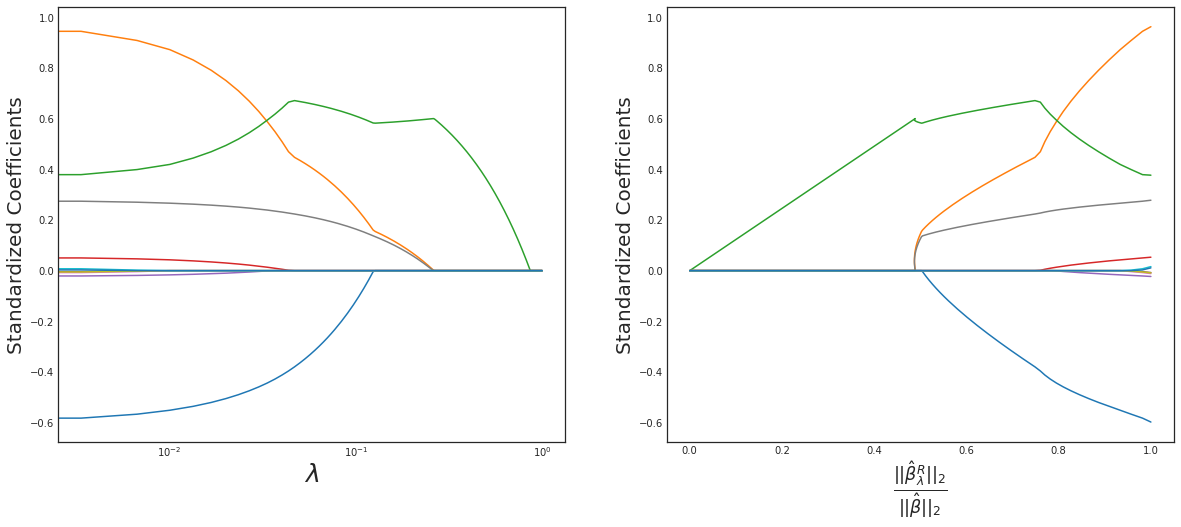

In [551]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = df1.drop(['Balance','Ethnicity'], axis=1).values
y = df1.Balance

## Scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

#alphas = np.insert(10**np.linspace(-2,0,200),0, 0)
alphas = np.linspace(0,1,300)
lasso = Lasso()
lasso_coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

## calculating estimated beta_hat_l2_norm ##################
beta_hat_l2_norm = np.sqrt(np.square(lasso_coefs).sum(axis=1))
    
## Calculating coeffs when lamda/alpha=0, lasso regression gives the same value as RSS (least square method)
lasso.set_params(alpha=0)
lasso.fit(X,y)
least_square_coeff = lasso.coef_
beta_l2_norm = np.sqrt(np.square(least_square_coeff).sum())

ratio = beta_hat_l2_norm/beta_l2_norm

## Plotting the graph
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.plot(alphas, lasso_coefs)
ax1.set_xscale('log')
ax1.set_xlabel(r'$\lambda$', fontsize=25)
ax1.set_ylabel('Standardized Coefficients', fontsize=20)

ax2.plot(ratio, lasso_coefs)
ax2.set_xlabel(r'$\frac{\|\|\hat{\beta}^R_\lambda\|\|_2}{\|\|\hat{\beta}\|\|_2}$', fontsize=25)
ax2.set_ylabel('Standardized Coefficients', fontsize=20)

for $p=2$ then (6.8) indicates that the lasso coefficient estimates have
the smallest RSS out of all points that lie within the diamond defined by $|β1| + |β2| ≤ s$. Similarly, the ridge regression estimates have the smallest
RSS out of all points that lie within the circle defined by β2
1 + β2
2
≤ s.

### $\|\beta_1\|+\|\beta_2\| \geqslant 4$

<img src="img/ridge_lasso_6.8_6.9.PNG" width=60% align='left'>

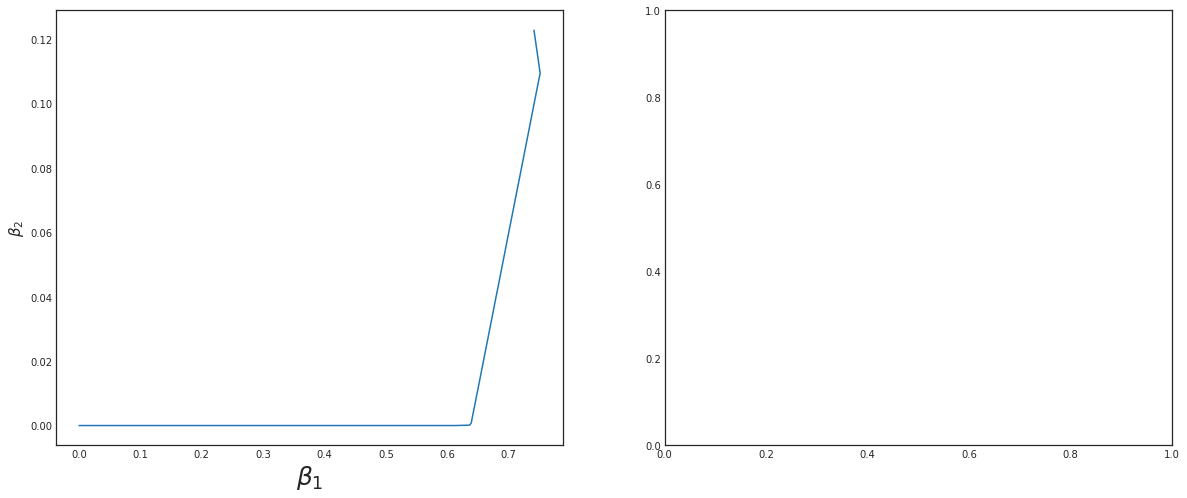

In [550]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler


X = df1[['Rating','Limit']].values
y = df1.Balance

## Scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

### ESTIMATION OF ORDINARY LEAST SQUARE COEFFICIENTS
regr = LinearRegression()
regr.fit(X,y)
ols_coeff = regr.coef_

### ESTIMATION OF LASSO COEFFICIENTS WITH DIFFERENT ALPHA
lasso = Lasso()
lasso_coefs = []

for a in np.linspace(0,1,300):
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

### ESTIMATION OF RIDGE COEFFICIENTS WITH DIFFERENT ALPHA
ridge = Ridge()
ridge_coeff = []

alphas = np.insert(10**np.linspace(-2,6,200),0, 0)
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    ridge_coeff.append(ridge.coef_)


## Plotting the graph
ridge_coeff = np.array(ridge_coeff)
lasso_coefs = np.array(lasso_coefs)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(lasso_coefs[:,0], lasso_coefs[:,1])
ax1.set_xlabel(r'$\beta_1$', fontsize=25)
ax1.set_ylabel(r'$\beta_2$', fontsize=15)

In [298]:
#least_square_coeff
np.array(lasso_coefs).shape
#ridge_coeff

(300, 11)

In [548]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(, X1[:,1])
ax1.plot(lasso_coefs[:,0], lasso_coefs[:,1])
ax1.set_xlabel(r'$\beta_1$', fontsize=15)
ax1.set_ylabel(r'$\beta_2$', fontsize=15)

ax2.plot(X2[:,0], X2[:,1])
ax2.plot(X2[:,0], X2[:,1])
ax2.set_xlabel(r'$\beta_1$', fontsize=15)
ax2.set_ylabel(r'$\beta_2$', fontsize=15)

SyntaxError: invalid syntax (<ipython-input-548-44e2f1756cd4>, line 3)

### FIGURE 6.8

Ref : https://daviddalpiaz.github.io/r4sl/simulating-the-biasvariance-tradeoff.html


In [528]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def true_f(x):
    return x**2

def simulate_data(f, sample_size=1000):
    X = np.linspace(0, 1, sample_size)
    Y = f(X) + np.random.normal(0, np.sqrt(0.01), sample_size)
    return np.column_stack((X, Y))

def get_bias(true_f, estimated_f, X):
    bias = np.mean(estimated_f(X).reshape(-1,1) - true_f(X))
    return bias

sim_data = simulate_data(true_f, sample_size=100)
sim_data.shape

X = sim_data[:,0].reshape(-1,1)
y = sim_data[:,1].flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### CALCULATING IRREDUCIBLE ERROR - var(e) ####################
var_e = mean_squared_error(y, true_f(X))

### Fitting a ORDINARY LEAST SQUARE REGRESSION #############
ols = Lasso(alpha=0)
ols.fit(X, y)

### Fitting a Ridge Regression #############

alphas = np.linspace(0,50,500)

ridge = Ridge()
ridge_results = {'alpha':[], 'coeff':[], 'train_mse':[],'test_mse':[], 'r2_score':[], 'bias':[]}
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    
    ridge_results['alpha'].append(a)
    ridge_results['coeff'].append(ridge.coef_[0])
    ridge_results['train_mse'].append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_results['test_mse'].append(mean_squared_error(y_test, ridge.predict(X_test)))
    ridge_results['r2_score'].append(r2_score(y, y_pred))
    ridge_results['bias'].append(get_bias(true_f, ridge.predict, X))

### Fitting a Lasso Regression #############
lasso = Lasso()
lasso_results = {'alpha':[], 'coeff':[], 'train_mse':[],'test_mse':[], 'r2_score':[]}
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    
    lasso_results['alpha'].append(a)
    lasso_results['coeff'].append(lasso.coef_[0])
    lasso_results['train_mse'].append(mean_squared_error(y_train, ridge.predict(X_train)))
    lasso_results['test_mse'].append(mean_squared_error(y_test, ridge.predict(X_test)))
    lasso_results['r2_score'].append(r2_score(y, y_pred)) 

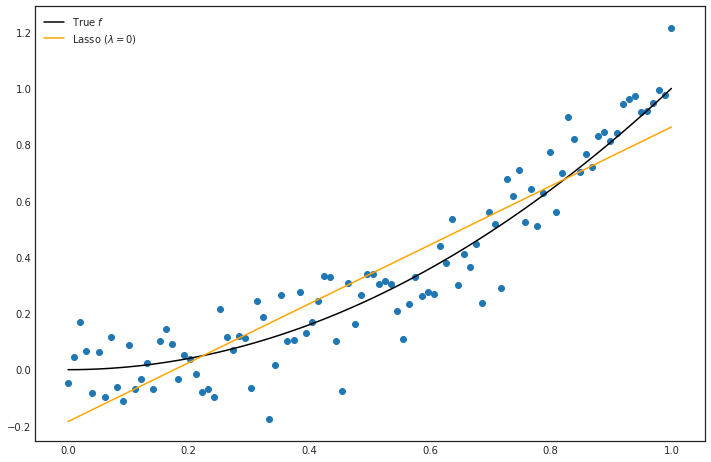

In [529]:
## plotting the model #################
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y)

plt.plot(X[:,0], true_f(X), label=r'True $f$', color='k')
plt.plot(X[:,0], ols.predict(X), label=r'Lasso ($\lambda=0$)', color='orange')
plt.legend(loc=2)

In [540]:
var_e

0.01048074320480042

In [544]:
ridge_results = pd.DataFrame(ridge_results)
ridge_results['variance'] = ridge_results['test_mse'] - ridge_results['bias'] - var_e

(0, 0.1)

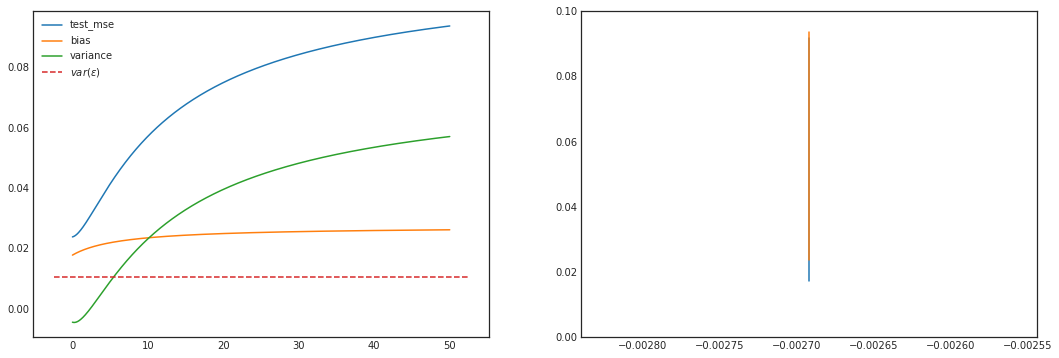

In [543]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

#ax1.plot(ridge_results['alpha'], ridge_results['train_mse'], label='train_mse')
ax1.plot(ridge_results['alpha'], ridge_results['test_mse'], label='test_mse')
ax1.plot(ridge_results['alpha'], ridge_results['bias'], label='bias')
ax1.plot(ridge_results['alpha'], ridge_results['variance'], label='variance')
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [var_e,var_e], label=r'$var(\epsilon)$', linestyle='--')
ax1.legend(loc=2)

#ax1.set_ylim(0, 0.3)
#ax1.set_xlim(0, 1)


#ax2.plot([0, 1], [var_e,var_e], label=r'$var(\epsilon)$', linestyle='--')
ax2.plot(ridge_results['r2_score'], ridge_results['train_mse'], label='train_mse')
ax2.plot(ridge_results['r2_score'], ridge_results['test_mse'], label='test_mse')
ax2.set_ylim(0, 0.1)
#ax2.set_xlim(ridge_results['r2_score'].min(), ridge_results['r2_score'].max())

# --------------------- Rough Below ----------------------------------------------------

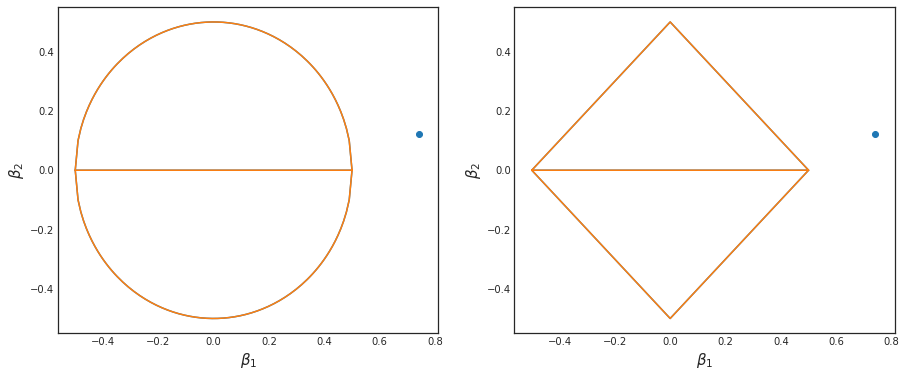

In [552]:
def get_circle(r):
    X = np.linspace(-r, r, 100)    
    Y = np.sqrt(r*r - X*X)
    y1 = np.array(list(zip(X,Y)))
    y2 = np.array(list(zip(X,-Y)))
    return np.concatenate((y1, y2), axis=0)

def get_diamond(r):
    X = np.linspace(-r, r, 9)
    Y = r - np.abs(X)
    y1 = np.array(list(zip(X,Y)))
    y2 = np.array(list(zip(X,-Y)))
    return np.concatenate((y1, y2), axis=0)

X1 = get_circle(0.5)
X2 = get_diamond(0.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(X1[:,0], X1[:,1])
ax1.plot(X1[:,0], X1[:,1])
ax1.scatter(ols_coeff[0], ols_coeff[1])
ax1.set_xlabel(r'$\beta_1$', fontsize=15)
ax1.set_ylabel(r'$\beta_2$', fontsize=15)

ax2.plot(X2[:,0], X2[:,1])
ax2.plot(X2[:,0], X2[:,1])
ax2.scatter(ols_coeff[0], ols_coeff[1])
ax2.set_xlabel(r'$\beta_1$', fontsize=15)
ax2.set_ylabel(r'$\beta_2$', fontsize=15)